In [7]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the headline to explore this code.

In [2]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [4]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define the dataset

The dataset consists of 12 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).


In [5]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters

The hyperparameters in this Colab are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

2021-09-11 13:37:39.887386: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-11 13:37:39.887693: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-11 13:37:39.897205: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2021-09-11 13:37:40.021395: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-11 13:37:40.040081: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899885000 Hz


Epoch 1/10
1/1 [==============================] - 0s 402ms/step - loss: 982.4800 - root_mean_squared_error: 31.3445
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 966.1929 - root_mean_squared_error: 31.0836
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 954.5088 - root_mean_squared_error: 30.8951
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 944.8034 - root_mean_squared_error: 30.7377
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 936.2451 - root_mean_squared_error: 30.5981
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 928.4478 - root_mean_squared_error: 30.4704
Epoch 7/10
1/1 [==============================] - 0s 15ms/step - loss: 921.1971 - root_mean_squared_error: 30.3512
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 914.3596 - root_mean_squared_error: 30.2384
Epoch 9/10
1/1 [==============================] - 0s 29ms/step - loss: 907.8458 - r

/home/oem/miniconda3/envs/ml_google/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


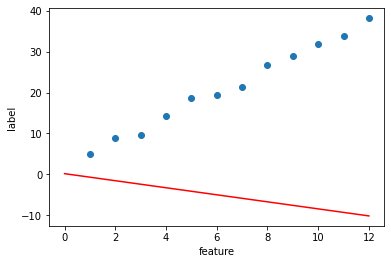

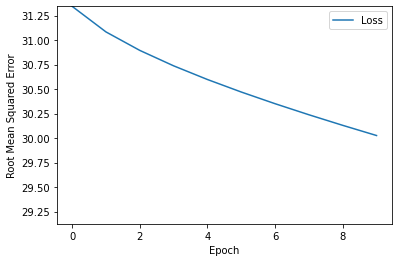

In [6]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 1: Examine the graphs

Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

Epoch 1/400
1/1 [==============================] - 0s 332ms/step - loss: 895.6500 - root_mean_squared_error: 29.9274
Epoch 2/400
1/1 [==============================] - 0s 4ms/step - loss: 880.1025 - root_mean_squared_error: 29.6665
Epoch 3/400
1/1 [==============================] - 0s 7ms/step - loss: 868.9549 - root_mean_squared_error: 29.4780
Epoch 4/400
1/1 [==============================] - 0s 15ms/step - loss: 859.6987 - root_mean_squared_error: 29.3206
Epoch 5/400
1/1 [==============================] - 0s 5ms/step - loss: 851.5390 - root_mean_squared_error: 29.1811
Epoch 6/400
1/1 [==============================] - 0s 7ms/step - loss: 844.1072 - root_mean_squared_error: 29.0535
Epoch 7/400
1/1 [==============================] - 0s 5ms/step - loss: 837.1980 - root_mean_squared_error: 28.9344
Epoch 8/400
1/1 [==============================] - 0s 6ms/step - loss: 830.6843 - root_mean_squared_error: 28.8216
Epoch 9/400
1/1 [==============================] - 0s 6ms/step - loss: 824.48

1/1 [==============================] - 0s 3ms/step - loss: 554.1651 - root_mean_squared_error: 23.5407
Epoch 72/400
1/1 [==============================] - 0s 5ms/step - loss: 550.4051 - root_mean_squared_error: 23.4607
Epoch 73/400
1/1 [==============================] - 0s 6ms/step - loss: 546.6584 - root_mean_squared_error: 23.3807
Epoch 74/400
1/1 [==============================] - 0s 4ms/step - loss: 542.9250 - root_mean_squared_error: 23.3008
Epoch 75/400
1/1 [==============================] - 0s 3ms/step - loss: 539.2050 - root_mean_squared_error: 23.2208
Epoch 76/400
1/1 [==============================] - 0s 6ms/step - loss: 535.4983 - root_mean_squared_error: 23.1408
Epoch 77/400
1/1 [==============================] - 0s 6ms/step - loss: 531.8049 - root_mean_squared_error: 23.0609
Epoch 78/400
1/1 [==============================] - 0s 5ms/step - loss: 528.1248 - root_mean_squared_error: 22.9810
Epoch 79/400
1/1 [==============================] - 0s 5ms/step - loss: 524.4578 - ro

1/1 [==============================] - 0s 5ms/step - loss: 322.8407 - root_mean_squared_error: 17.9678
Epoch 142/400
1/1 [==============================] - 0s 5ms/step - loss: 320.0021 - root_mean_squared_error: 17.8886
Epoch 143/400
1/1 [==============================] - 0s 5ms/step - loss: 317.1765 - root_mean_squared_error: 17.8095
Epoch 144/400
1/1 [==============================] - 0s 17ms/step - loss: 314.3640 - root_mean_squared_error: 17.7303
Epoch 145/400
1/1 [==============================] - 0s 10ms/step - loss: 311.5646 - root_mean_squared_error: 17.6512
Epoch 146/400
1/1 [==============================] - 0s 6ms/step - loss: 308.7782 - root_mean_squared_error: 17.5721
Epoch 147/400
1/1 [==============================] - 0s 5ms/step - loss: 306.0049 - root_mean_squared_error: 17.4930
Epoch 148/400
1/1 [==============================] - 0s 5ms/step - loss: 303.2447 - root_mean_squared_error: 17.4139
Epoch 149/400
1/1 [==============================] - 0s 13ms/step - loss: 30

1/1 [==============================] - 0s 5ms/step - loss: 155.5388 - root_mean_squared_error: 12.4715
Epoch 212/400
1/1 [==============================] - 0s 5ms/step - loss: 153.6075 - root_mean_squared_error: 12.3939
Epoch 213/400
1/1 [==============================] - 0s 6ms/step - loss: 151.6891 - root_mean_squared_error: 12.3162
Epoch 214/400
1/1 [==============================] - 0s 5ms/step - loss: 149.7834 - root_mean_squared_error: 12.2386
Epoch 215/400
1/1 [==============================] - 0s 12ms/step - loss: 147.8906 - root_mean_squared_error: 12.1610
Epoch 216/400
1/1 [==============================] - 0s 6ms/step - loss: 146.0106 - root_mean_squared_error: 12.0835
Epoch 217/400
1/1 [==============================] - 0s 29ms/step - loss: 144.1433 - root_mean_squared_error: 12.0060
Epoch 218/400
1/1 [==============================] - 0s 17ms/step - loss: 142.2889 - root_mean_squared_error: 11.9285
Epoch 219/400
1/1 [==============================] - 0s 7ms/step - loss: 14

1/1 [==============================] - 0s 5ms/step - loss: 50.9649 - root_mean_squared_error: 7.1390
Epoch 282/400
1/1 [==============================] - 0s 5ms/step - loss: 49.9143 - root_mean_squared_error: 7.0650
Epoch 283/400
1/1 [==============================] - 0s 5ms/step - loss: 48.8758 - root_mean_squared_error: 6.9911
Epoch 284/400
1/1 [==============================] - 0s 5ms/step - loss: 47.8496 - root_mean_squared_error: 6.9173
Epoch 285/400
1/1 [==============================] - 0s 5ms/step - loss: 46.8355 - root_mean_squared_error: 6.8436
Epoch 286/400
1/1 [==============================] - 0s 3ms/step - loss: 45.8336 - root_mean_squared_error: 6.7701
Epoch 287/400
1/1 [==============================] - 0s 4ms/step - loss: 44.8439 - root_mean_squared_error: 6.6966
Epoch 288/400
1/1 [==============================] - 0s 3ms/step - loss: 43.8664 - root_mean_squared_error: 6.6232
Epoch 289/400
1/1 [==============================] - 0s 20ms/step - loss: 42.9010 - root_mean_

1/1 [==============================] - 0s 7ms/step - loss: 5.4739 - root_mean_squared_error: 2.3396
Epoch 353/400
1/1 [==============================] - 0s 8ms/step - loss: 5.2244 - root_mean_squared_error: 2.2857
Epoch 354/400
1/1 [==============================] - 0s 5ms/step - loss: 4.9843 - root_mean_squared_error: 2.2326
Epoch 355/400
1/1 [==============================] - 0s 15ms/step - loss: 4.7535 - root_mean_squared_error: 2.1802
Epoch 356/400
1/1 [==============================] - 0s 21ms/step - loss: 4.5319 - root_mean_squared_error: 2.1288
Epoch 357/400
1/1 [==============================] - 0s 8ms/step - loss: 4.3194 - root_mean_squared_error: 2.0783
Epoch 358/400
1/1 [==============================] - 0s 10ms/step - loss: 4.1159 - root_mean_squared_error: 2.0288
Epoch 359/400
1/1 [==============================] - 0s 8ms/step - loss: 3.9212 - root_mean_squared_error: 1.9802
Epoch 360/400
1/1 [==============================] - 0s 4ms/step - loss: 3.7353 - root_mean_squared

/home/oem/miniconda3/envs/ml_google/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


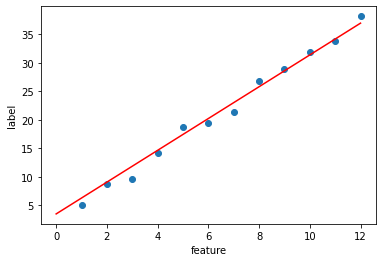

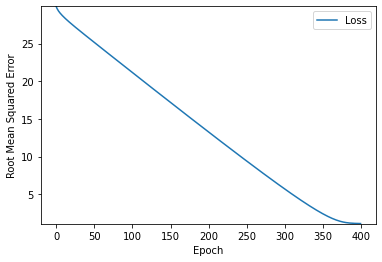

In [16]:
learning_rate=0.01
epochs=400
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Epoch 1/500
1/1 [==============================] - 0s 340ms/step - loss: 589.3853 - root_mean_squared_error: 24.2773
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 6690592.0000 - root_mean_squared_error: 2586.6179
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 584.3900 - root_mean_squared_error: 24.1742
Epoch 4/500
1/1 [==============================] - 0s 15ms/step - loss: 3.3757 - root_mean_squared_error: 1.8373
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 1.0229 - root_mean_squared_error: 1.0114
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9821 - root_mean_squared_error: 0.9910
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 0.9742 - root_mean_squared_error: 0.9870
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 0.9675 - root_mean_squared_error: 0.9836
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 0.9609 - roo

1/1 [==============================] - 0s 5ms/step - loss: 165131.7969 - root_mean_squared_error: 406.3641
Epoch 72/500
1/1 [==============================] - 0s 6ms/step - loss: 124309.2109 - root_mean_squared_error: 352.5751
Epoch 73/500
1/1 [==============================] - 0s 5ms/step - loss: 101267.1484 - root_mean_squared_error: 318.2250
Epoch 74/500
1/1 [==============================] - 0s 10ms/step - loss: 91034.6875 - root_mean_squared_error: 301.7195
Epoch 75/500
1/1 [==============================] - 0s 5ms/step - loss: 90675.0938 - root_mean_squared_error: 301.1230
Epoch 76/500
1/1 [==============================] - 0s 3ms/step - loss: 99320.7891 - root_mean_squared_error: 315.1520
Epoch 77/500
1/1 [==============================] - 0s 3ms/step - loss: 117499.9297 - root_mean_squared_error: 342.7826
Epoch 78/500
1/1 [==============================] - 0s 5ms/step - loss: 145851.8906 - root_mean_squared_error: 381.9056
Epoch 79/500
1/1 [==============================] - 0s 

Epoch 139/500
1/1 [==============================] - 0s 4ms/step - loss: 171696.4219 - root_mean_squared_error: 414.3627
Epoch 140/500
1/1 [==============================] - 0s 9ms/step - loss: 170192.5781 - root_mean_squared_error: 412.5440
Epoch 141/500
1/1 [==============================] - 0s 12ms/step - loss: 168894.6719 - root_mean_squared_error: 410.9680
Epoch 142/500
1/1 [==============================] - 0s 7ms/step - loss: 168034.5156 - root_mean_squared_error: 409.9201
Epoch 143/500
1/1 [==============================] - 0s 4ms/step - loss: 167732.1406 - root_mean_squared_error: 409.5511
Epoch 144/500
1/1 [==============================] - 0s 3ms/step - loss: 167989.0781 - root_mean_squared_error: 409.8647
Epoch 145/500
1/1 [==============================] - 0s 3ms/step - loss: 168701.1406 - root_mean_squared_error: 410.7325
Epoch 146/500
1/1 [==============================] - 0s 3ms/step - loss: 169686.3281 - root_mean_squared_error: 411.9300
Epoch 147/500
1/1 [============

1/1 [==============================] - 0s 6ms/step - loss: 170499.3438 - root_mean_squared_error: 412.9156
Epoch 207/500
1/1 [==============================] - 0s 5ms/step - loss: 170464.0625 - root_mean_squared_error: 412.8729
Epoch 208/500
1/1 [==============================] - 0s 3ms/step - loss: 170422.8594 - root_mean_squared_error: 412.8230
Epoch 209/500
1/1 [==============================] - 0s 6ms/step - loss: 170384.7969 - root_mean_squared_error: 412.7769
Epoch 210/500
1/1 [==============================] - 0s 5ms/step - loss: 170357.0000 - root_mean_squared_error: 412.7433
Epoch 211/500
1/1 [==============================] - 0s 14ms/step - loss: 170344.1406 - root_mean_squared_error: 412.7277
Epoch 212/500
1/1 [==============================] - 0s 5ms/step - loss: 170347.2031 - root_mean_squared_error: 412.7314
Epoch 213/500
1/1 [==============================] - 0s 7ms/step - loss: 170364.0469 - root_mean_squared_error: 412.7518
Epoch 214/500
1/1 [==========================

1/1 [==============================] - 0s 6ms/step - loss: 170420.4531 - root_mean_squared_error: 412.8201
Epoch 274/500
1/1 [==============================] - 0s 8ms/step - loss: 170419.9219 - root_mean_squared_error: 412.8195
Epoch 275/500
1/1 [==============================] - 0s 4ms/step - loss: 170418.9219 - root_mean_squared_error: 412.8183
Epoch 276/500
1/1 [==============================] - 0s 4ms/step - loss: 170417.7812 - root_mean_squared_error: 412.8169
Epoch 277/500
1/1 [==============================] - 0s 12ms/step - loss: 170416.6875 - root_mean_squared_error: 412.8156
Epoch 278/500
1/1 [==============================] - 0s 7ms/step - loss: 170415.8438 - root_mean_squared_error: 412.8145
Epoch 279/500
1/1 [==============================] - 0s 24ms/step - loss: 170415.4688 - root_mean_squared_error: 412.8141
Epoch 280/500
1/1 [==============================] - 0s 13ms/step - loss: 170415.5156 - root_mean_squared_error: 412.8141
Epoch 281/500
1/1 [========================

1/1 [==============================] - 0s 8ms/step - loss: 170417.7969 - root_mean_squared_error: 412.8169
Epoch 341/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.7031 - root_mean_squared_error: 412.8168
Epoch 342/500
1/1 [==============================] - 0s 10ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 343/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 344/500
1/1 [==============================] - 0s 4ms/step - loss: 170417.5625 - root_mean_squared_error: 412.8166
Epoch 345/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 346/500
1/1 [==============================] - 0s 4ms/step - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 347/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.3906 - root_mean_squared_error: 412.8164
Epoch 348/500
1/1 [==========================

1/1 [==============================] - 0s 10ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 408/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.6562 - root_mean_squared_error: 412.8167
Epoch 409/500
1/1 [==============================] - 0s 5ms/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 410/500
1/1 [==============================] - 0s 5ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 411/500
1/1 [==============================] - 0s 13ms/step - loss: 170417.6250 - root_mean_squared_error: 412.8167
Epoch 412/500
1/1 [==============================] - 0s 19ms/step - loss: 170417.5625 - root_mean_squared_error: 412.8166
Epoch 413/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.5312 - root_mean_squared_error: 412.8166
Epoch 414/500
1/1 [==============================] - 0s 24ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 415/500
1/1 [=======================

1/1 [==============================] - 0s 17ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 475/500
1/1 [==============================] - 0s 21ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 476/500
1/1 [==============================] - 0s 17ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 477/500
1/1 [==============================] - 0s 15ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 478/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 479/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 480/500
1/1 [==============================] - 0s 12ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 481/500
1/1 [==============================] - 0s 9ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 482/500
1/1 [======================

/home/oem/miniconda3/envs/ml_google/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


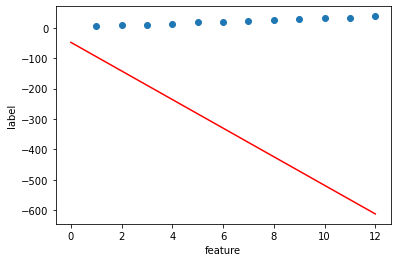

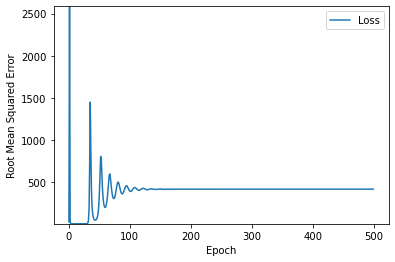

In [17]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a [roller coaster](https://www.wikipedia.org/wiki/Roller_coaster).  An oscillating loss curve strongly suggests that the learning rate is too high. 

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible: 

*  learning_rate
*  epochs

Epoch 1/70
1/1 [==============================] - 0s 328ms/step - loss: 585.3121 - root_mean_squared_error: 24.1932
Epoch 2/70
1/1 [==============================] - 0s 18ms/step - loss: 421.9604 - root_mean_squared_error: 20.5417
Epoch 3/70
1/1 [==============================] - 0s 3ms/step - loss: 327.8894 - root_mean_squared_error: 18.1077
Epoch 4/70
1/1 [==============================] - 0s 3ms/step - loss: 261.9982 - root_mean_squared_error: 16.1864
Epoch 5/70
1/1 [==============================] - 0s 8ms/step - loss: 212.1616 - root_mean_squared_error: 14.5658
Epoch 6/70
1/1 [==============================] - 0s 5ms/step - loss: 172.9342 - root_mean_squared_error: 13.1504
Epoch 7/70
1/1 [==============================] - 0s 5ms/step - loss: 141.3325 - root_mean_squared_error: 11.8883
Epoch 8/70
1/1 [==============================] - 0s 9ms/step - loss: 115.5139 - root_mean_squared_error: 10.7477
Epoch 9/70
1/1 [==============================] - 0s 23ms/step - loss: 94.2432 - root

/home/oem/miniconda3/envs/ml_google/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


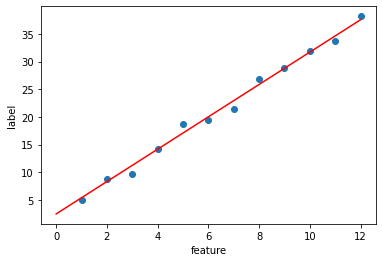

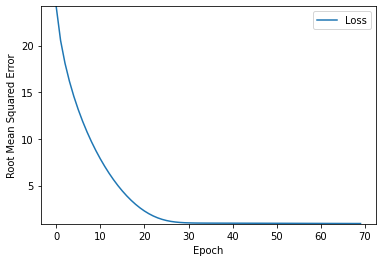

In [19]:
# Set the learning rate and number of epochs
learning_rate= 0.14  # Replace ? with a floating-point number
epochs= 70   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge. 

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

Epoch 1/100
12/12 [==============================] - 0s 5ms/step - loss: 1386.8984 - root_mean_squared_error: 36.8294
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 687.7192 - root_mean_squared_error: 25.5485
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 463.9215 - root_mean_squared_error: 21.2902
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 274.3992 - root_mean_squared_error: 15.7431
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 212.5690 - root_mean_squared_error: 14.1253
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 136.8102 - root_mean_squared_error: 11.5546
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 108.2885 - root_mean_squared_error: 10.1447
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 58.6674 - root_mean_squared_error: 7.6140
Epoch 9/100
12/12 [==============================] - 0s 3ms/step 

12/12 [==============================] - 0s 2ms/step - loss: 1.5016 - root_mean_squared_error: 1.2063
Epoch 73/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0383 - root_mean_squared_error: 1.0120
Epoch 74/100
12/12 [==============================] - 0s 2ms/step - loss: 1.5086 - root_mean_squared_error: 1.2138
Epoch 75/100
12/12 [==============================] - 0s 2ms/step - loss: 1.3708 - root_mean_squared_error: 1.1503
Epoch 76/100
12/12 [==============================] - 0s 3ms/step - loss: 1.2226 - root_mean_squared_error: 1.0851
Epoch 77/100
12/12 [==============================] - 0s 2ms/step - loss: 1.5501 - root_mean_squared_error: 1.1953
Epoch 78/100
12/12 [==============================] - 0s 3ms/step - loss: 1.1482 - root_mean_squared_error: 1.0537
Epoch 79/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0544 - root_mean_squared_error: 0.9516
Epoch 80/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0646 - root_mean_

/home/oem/miniconda3/envs/ml_google/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


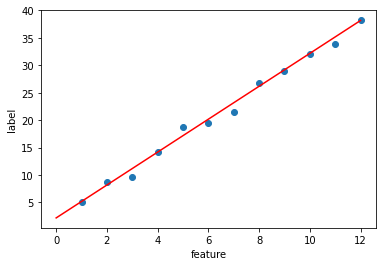

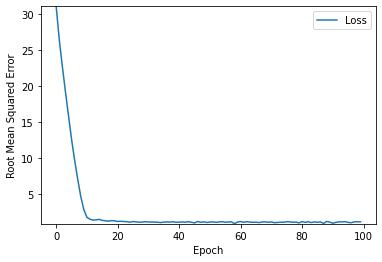

In [23]:
learning_rate=0.05
epochs=100
my_batch_size= 1  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.